<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/regression/polinomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! ls -ltr /content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_6_Polynomial_Regression/Python/Position_Salaries.csv

-rw------- 1 root root 246 Apr  7  2020 /content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_6_Polynomial_Regression/Python/Position_Salaries.csv


In [6]:
path = "/content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_6_Polynomial_Regression/Python/Position_Salaries.csv"
df = pd.read_csv(path)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Text(0.5, 1.0, 'Salary Level Graph')

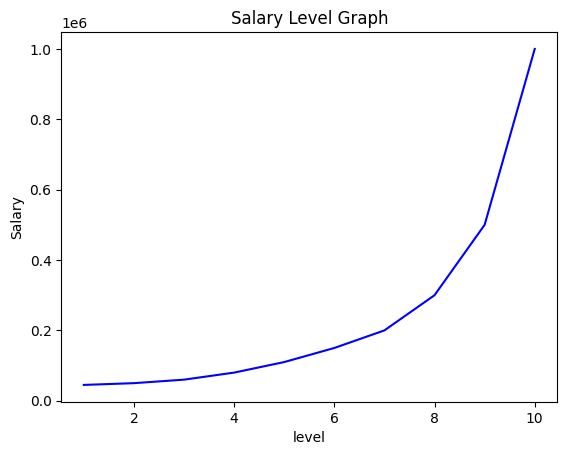

In [13]:
%matplotlib inline

plt.plot(df.Level,df.Salary,color="blue")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Salary Level Graph")

In [17]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [18]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [20]:
lr.predict([[3]])

array([47303.03030303])

Text(0.5, 1.0, 'Salary Level Graph')

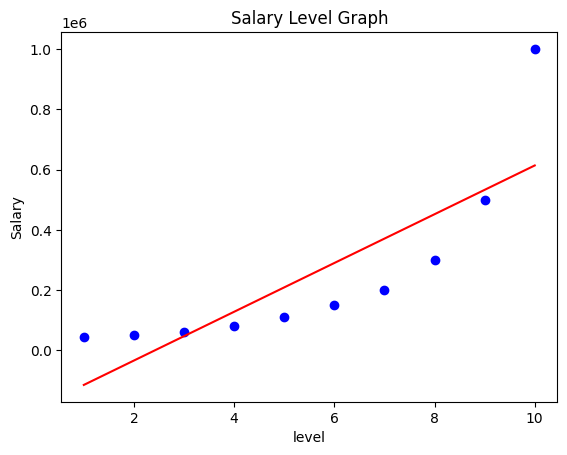

In [21]:
%matplotlib inline

plt.scatter(df.Level,df.Salary,color="blue")
plt.plot(df.Level,lr.predict(X),color="red")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Salary Level Graph")

In [46]:
from sklearn.preprocessing import PolynomialFeatures
deg = 2
pf = PolynomialFeatures(degree=deg)
X_poly = pf.fit_transform(X)

In [47]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [48]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

Text(0.5, 1.0, 'Salary Level Graph')

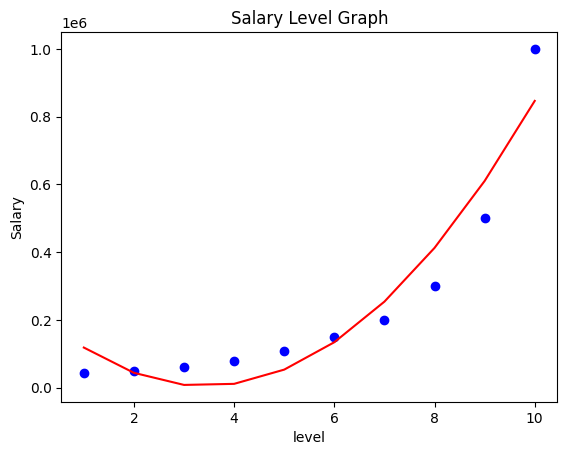

In [49]:
%matplotlib inline

plt.scatter(df.Level,df.Salary,color="blue")
plt.plot(df.Level,pol_reg.predict(X_poly),color="red")
plt.xlabel("level")
plt.ylabel("Salary")
plt.title("Salary Level Graph")

In [50]:
pol_reg.coef_

array([      0.        , -132871.21212121,   19431.81818182])

In [51]:
pol_reg.intercept_

232166.6666666664

In [55]:
pol_reg.predict(pf.fit_transform([[11],[20]])) # prediction for level 11 nd 20 with PR

array([1121833.33333333, 5347469.6969697 ])

In [56]:
lr.predict([[11],[20]]) # prediction for level 11 nd 20 with LR

array([ 694333.33333333, 1422242.42424242])